# Histogram of Oriented Gradient

This notebook shows how to calculate a histogram of oriented gradient on a certain image.

In [3]:
# Some common packages used throughout the notebook
%load_ext autoreload
%autoreload 2

# Import the NumPy module
import numpy as np

# Convient for outputting dictionaries
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from skimage import data, color, exposure
from satsense.features.hog import hog
from satsense.util import load_from_file, normalize_image, get_rgb_image

# Supported image formats include RGB, Quickbird and Worldview
from satsense.util import RGB, QUICKBIRD, WORLDVIEW2

# URI to the image
imagefile = '/home/bweel/Documents/projects/dynaslum/data/satelite/056239125010_01/056239125010_01_P001_MUL/08NOV02054348-M2AS_R1C1-056239125010_01_P001.TIF'
# Set the correct format here, it is used throughout the notebook
bands = QUICKBIRD

# Loading the file
dataset, image = load_from_file(imagefile)

# Histogram of Oriented Gradient

The hog function of satsense is a very small wrapper function for the skimage hog function. It converts the numpy multiband image to a grayscale image to calculate the hog. It accepts the band description as well as all skimage hog named parameters.

In [7]:
fd, hog_image = hog(image, bands=bands, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True, transform_sqrt=False)

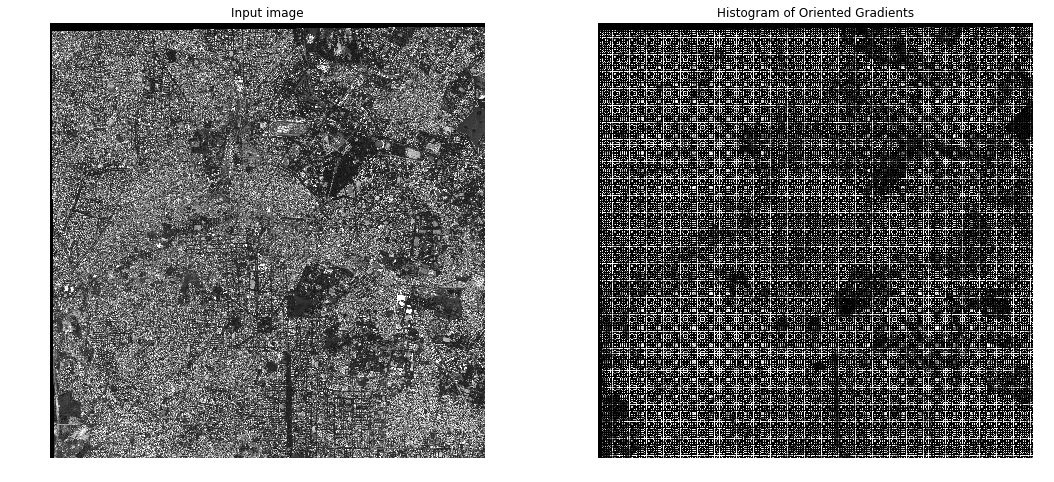

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

rgb_image = get_rgb_image(image, bands)
img = color.rgb2gray(rgb_image)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display<
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()